In [20]:
from numpy import where
import pandas as pd
from sklearn.datasets import make_classification
# from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

le = LabelEncoder()

In [21]:
df = pd.read_csv('for_clustering_math_outputs.csv')
df.head()

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,s,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,s,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,s,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,c,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,c,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [22]:
df['chatter_presence'] = le.fit_transform(df['chatter_presence'])
df.head() # s = 2; c = 0; i = 1

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [23]:
X = df[['chatter_presence', 'freq_max']]

In [24]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/naju/.local/lib/python3.10/site-pa

Text(0, 0.5, 'WCSS')

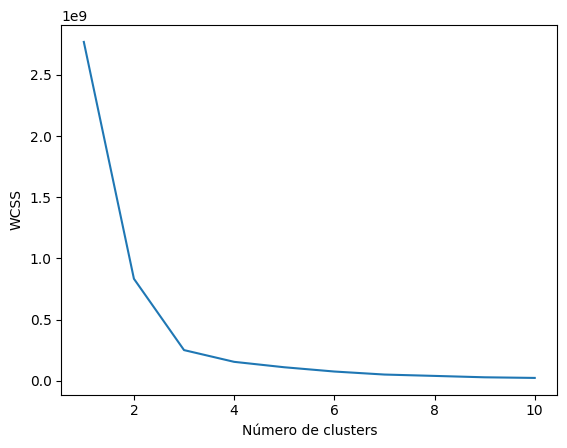

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [26]:
df['cluster'] = y_kmeans
df.head()

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,cluster
0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542,0
1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478,1
2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834,1
3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744,1
4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385,0


In [27]:
df.cluster.value_counts()

1    202
0    162
Name: cluster, dtype: int64

In [28]:
df.to_csv('kmeans_output.csv')